<a href="https://colab.research.google.com/github/Gayatri8-sys/Machine-Learning/blob/main/XGBM_LGBM_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train=pd.read_csv("/content/Titanic_train.csv")
test=pd.read_csv('/content/Titanic_test.csv')

In [ ]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Evaluating Model by splitting "train" dataset intro train, test

In [ ]:
train.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [ ]:
train['Sex']=train['Sex'].fillna(train['Sex'].mode())
test['Sex']=test['Sex'].fillna(test['Sex'].mode())

In [ ]:
train['Sex'].nunique()

2

In [ ]:
train['Sex']=train['Sex'].map({'male':0,'female':1})
test['Sex']=test['Sex'].map({'male':0,'female':1})

In [ ]:
train['Sex'].dtype

dtype('int64')

In [ ]:
test['Sex'].dtype

dtype('int64')

In [ ]:
train['Sex'].isnull().sum()

np.int64(0)

In [ ]:
test['Sex'].isnull().sum()

np.int64(0)

In [ ]:
features=['Pclass','Sex', 'Age', 'Fare']

In [ ]:
X_train=train[features]
X_test=test[features]
y_train=train['Survived']

In [ ]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [ ]:
X_train['Age'].fillna(X_train['Age'].median(), inplace=True)
X_test['Age'].fillna(X_test['Age'].median(), inplace=True)
X_test['Fare'].fillna(X_test['Fare'].median(), inplace=True)

/tmp/ipython-input-118-2714930667.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['Age'].fillna(X_train['Age'].median(), inplace=True)
/tmp/ipython-input-118-2714930667.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Age'].fillna(X_train['Age'].median(), inplace=True)
/tmp/ipython-input-118-2714930667.py:2: FutureWarni

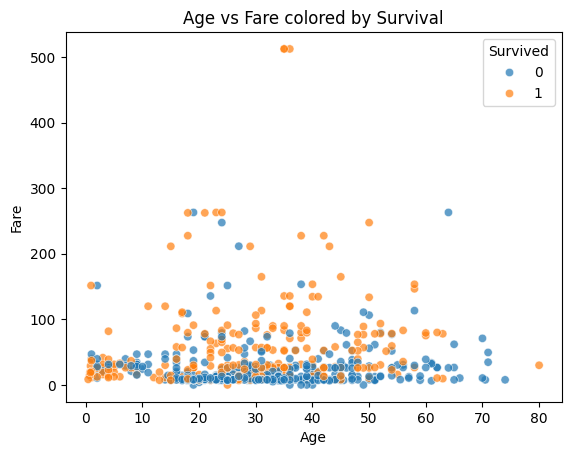

In [ ]:
sns.scatterplot(x=train['Age'], y=train['Fare'], hue=train['Survived'], data=train, alpha=0.7)
plt.title('Age vs Fare colored by Survival')
plt.show()

In [ ]:
numeric_features=['Pclass', 'Age', 'Fare']
binary_features=['Sex']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_scaled_num=scaler.fit_transform(X_train[numeric_features])
X_test_scaled_num=scaler.transform(X_test[numeric_features])

In [ ]:
X_train_final = np.hstack([X_train_scaled_num, X_train[binary_features].values])
X_test_final = np.hstack([X_test_scaled_num, X_test[binary_features].values])

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model=XGBClassifier()
model.fit(X_train_final,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred=model.predict(X_test_final)

In [ ]:
y_prediction=pd.DataFrame(y_pred, columns=['SURVIVED'])

In [ ]:
final_Test_data_XGBM= pd.concat([test,y_prediction], axis=1)

In [ ]:
final_Test_data_XGBM

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SURVIVED
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,S,0


Evaluation

In [ ]:
from sklearn.model_selection import train_test_split

x1=train[['Pclass', 'Age', 'Sex', 'Fare']]
y1=train['Survived']

In [ ]:
x1_tr,x1_te, y1_tr, y1_te=train_test_split(x1,y1, test_size=0.2, random_state=42)

In [ ]:
xgbm=XGBClassifier()
xgbm.fit(x1_tr,y1_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y1_pred=xgbm.predict(x1_te)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_score(y1_te,y1_pred)

0.7932960893854749

In [ ]:
# xgbm model has 79032 % accuracy

In [ ]:
precision_score(y1_te,y1_pred)

0.7534246575342466

In [ ]:
recall_score(y1_te,y1_pred)

0.7432432432432432

In [ ]:
f1_score(y1_te,y1_pred)

0.7482993197278912

# LGBM

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
lgbm=LGBMClassifier()
lgbm.fit(x1_tr,y1_tr)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000493 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 178
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

LGBMClassifier()

In [ ]:
yl_pred=lgbm.predict(x1_te)

In [ ]:
accuracy_score(y1_te,yl_pred)


0.8100558659217877

In [ ]:
precision_score(y1_te,yl_pred)


0.7857142857142857

In [ ]:
recall_score(y1_te,yl_pred)


0.7432432432432432

In [ ]:
f1_score(y1_te,yl_pred)

0.7638888888888888

In [ ]:
yl_prediction=pd.DataFrame(yl_pred, columns=['Survived'])

In [ ]:
final_test_data_LGBM=pd.concat([test,yl_prediction], axis=1)

In [ ]:
# visualize for each algo

results=pd.DataFrame({
    'Model':['XGBM', 'LGBM'],
    'Accuracy':[79.30, 81.00],
    'Precision':[75.34, 78.57],
    'Recall':[74.32, 74.32],
    'F1 Score':[74.83, 76.38]
})

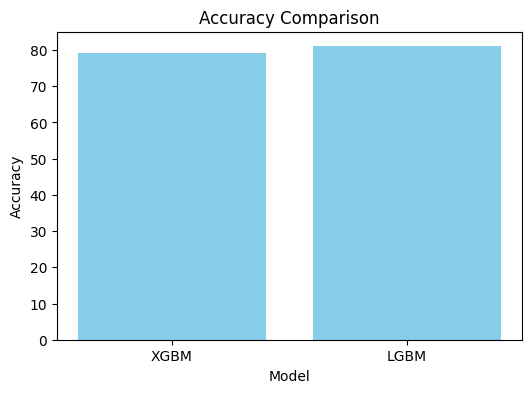

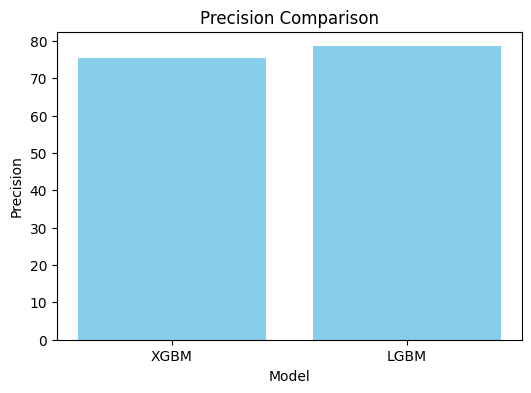

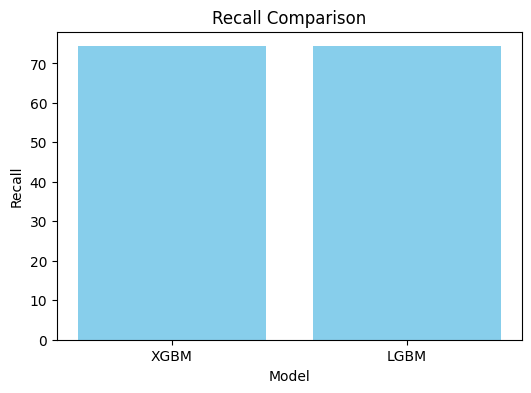

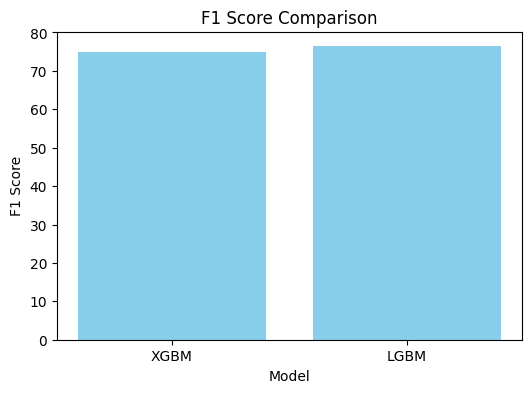

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
for metric in metrics:
    plt.figure(figsize=(6, 4))
    plt.bar(results['Model'], results[metric], color='skyblue')
    plt.title(f'{metric} Comparison')
    plt.ylabel(metric)
    plt.xlabel('Model')
    plt.show()